# Intro to Numerical Methods:
### Finite Differencing and Understanding Velocities and Accelerations

Suppose we have $n$ position measurements, for anything:

$$[x_0,x_1,x_2,...,x_{n-1}]$$

and for these positions, there are $n$ associated times:

$$[t_0,t_1,t_2,...,t_{n-1}]$$

In a sence, we have a function that gives position outputs from time inputs:

$$x(t)  = x_i \text{, when } t = t_i$$

$$x: [t_0,t_1,t_2,...,t_{n-1}] \longrightarrow [x_0,x_1,x_2,...,x_{n-1}]$$

#### How do we determine the velocity?
When a function specifies the path of an object in time, the usual calculus way of determining the velocity is to take the first derivatve:
$$v(t) = \frac{dx}{dt}(t)$$
But you can only take derivatives when functions are "smooth" enough, and our function for positions is not smooth, nor continous; it's discrete.

So, we have to take finite differences:

$$
\begin{align}
\begin{cases}
[x_0,x_1,...,x_{n-1}] \\
[t_0,t_1,...,t_{n-1}]
\end{cases} & \longrightarrow & \left[\frac{x_1-x_0}{t_1-t_0},\frac{x_2-x_1}{t_2-t_1},...,\frac{x_{n-1}-x_{n-2}}{t_{n-1}-t_{n-2}}\right] = [v_0,v_1,...,v_{n-2}]
\end{align}
$$

We are missing the $n^\text{th}$ entry for velocity, but we actually can't retrieve it, as we would require the $(n+1)^\text{th}$ entries in $x$ and $t$.

# Exercise: Use these principles

Determine the velocity at each point in time of the data provided in the folder "4.18mm". Here's how to import the data and how it looks:

In [6]:
import numpy as np
import matplotlib.pyplot as plt

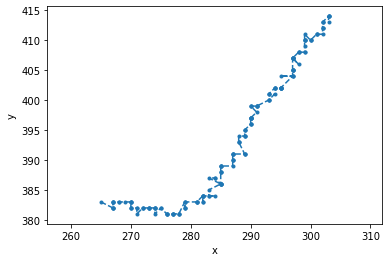

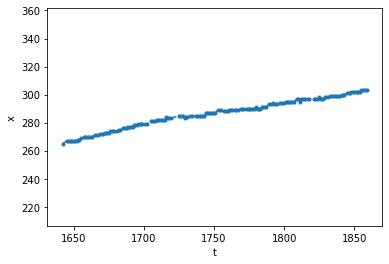

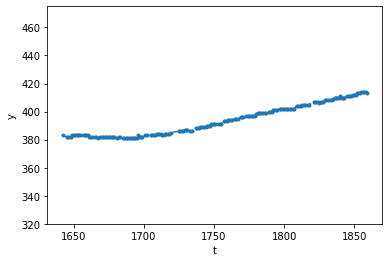

In [7]:

#Import the data:
path = "4.18mm\\Day6_4_18mm_Droplet (1).csv" #specify the path
data = np.loadtxt(path, dtype = float, delimiter = ",") #load the data into an nd-array

#extract the columns of the data:
frame = data[:,0] #the frame number, from the camera
x = data[:,1] #
y = data[:,2]

##################
#Visualize the Data

#Plot in position space:
plt.plot(x,y,".--")
plt.xlabel("x")
plt.ylabel("y")
plt.axis('equal')
plt.show()

#Plot x vs t
plt.plot(frame,x,".--")
plt.ylabel("x")
plt.xlabel("t")
plt.axis('equal')
plt.show()

#Plot y vs t
plt.plot(frame,y,".--")
plt.ylabel("y")
plt.xlabel("t")
plt.axis('equal')
plt.show()
